# Erzeugung eines GHZ-Zustands

Das Programm definiert einen Schaltkreis zur Erzeugung des GHZ-Zustands

$$ |\Psi \rangle = \frac{1}{\sqrt{2}} \Big( |000\rangle + |111\rangle \Big) $$

und führt eine Simulation mit anschließender Messung aus.

In [1]:
# import qiskit stuff
import qiskit
from qiskit import QuantumCircuit,  execute, Aer
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram

#import python stuff
import matplotlib.pyplot as plt
import numpy as np

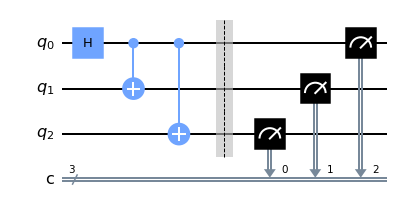

In [2]:
# Definition des Schaltkreis
circuit = QuantumCircuit(3,3)

circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.barrier()
circuit.measure([2,1,0],[0,1,2]) # Vertausche die Messreihenfolge
circuit.draw('mpl')

{'000': 4984, '111': 5016}


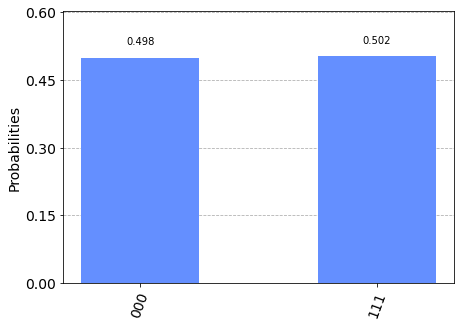

In [3]:
# Ausführen einer Simulation
backend = Aer.get_backend('qasm_simulator')

job = execute(circuit, backend, shots=10000)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)